# Rhodococcus Data with Shapley


### Set up imports

In [2]:
# !pip install shap
import os
import pandas as pd
import matplotlib.pyplot as plt
import shap
import numpy as np
from sklearn.ensemble import RandomForestClassifier
# from sklearn import preprocessing
# from sklearn import utils
# from sklearn.datasets import make_classification
# from sklearn.preprocessing import StandardScaler

/home/codespace/.python/current/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
rhodo_df = pd.read_csv('data/rhodo_data.csv')
rhodo_df.head(2)

,sample,2-aminoadipic acid,2'-Deoxycytidine 5'-monophosphoric acid,3-phosphoglycerate,4-aminobutyric acid (GABA),Adenine,Arachidic acid,Beta-alanine,Carbonate ion,Citric acid,...,Maltotriose,Melibiose,O-phospho-L-serine,PhlorobenzoPHEnone,Phytanic acid,Porphine,Shikimate-3-phosphate,Turanose,Unknown - Carbohydrate 001,Unknown - Carbohydrate 002
0,SG_1,361520.3973,158448.3434,322605.0733,677195.0481,710902.5555,21587.08363,1742924.769,2187317.706,73643.82800,...,197109.0981,154515.4823,912327.9657,54886.78433,53255.60385,1.567848e+06,79592.7445,41592.87779,106902.77270,178790.73570
1,SG_2,227309.5576,213583.3661,312837.4294,575822.1064,510742.4749,30589.63167,1362157.065,2078919.836,85094.11759,...,132211.9452,178537.3888,546466.6858,13966.87377,54527.47672,9.428716e+05,101591.3118,125701.00550,92505.27963,61108.72574


In [4]:
sample_values = rhodo_df['sample']

new_sample_names = []

for sample in sample_values:
    new_sample_name = sample.split('_')[0]
    
    new_sample_names.append(new_sample_name)

rhodo_df['sample'] = new_sample_names
rhodo_df.head(2)


,sample,2-aminoadipic acid,2'-Deoxycytidine 5'-monophosphoric acid,3-phosphoglycerate,4-aminobutyric acid (GABA),Adenine,Arachidic acid,Beta-alanine,Carbonate ion,Citric acid,...,Maltotriose,Melibiose,O-phospho-L-serine,PhlorobenzoPHEnone,Phytanic acid,Porphine,Shikimate-3-phosphate,Turanose,Unknown - Carbohydrate 001,Unknown - Carbohydrate 002
0,SG,361520.3973,158448.3434,322605.0733,677195.0481,710902.5555,21587.08363,1742924.769,2187317.706,73643.82800,...,197109.0981,154515.4823,912327.9657,54886.78433,53255.60385,1.567848e+06,79592.7445,41592.87779,106902.77270,178790.73570
1,SG,227309.5576,213583.3661,312837.4294,575822.1064,510742.4749,30589.63167,1362157.065,2078919.836,85094.11759,...,132211.9452,178537.3888,546466.6858,13966.87377,54527.47672,9.428716e+05,101591.3118,125701.00550,92505.27963,61108.72574


In [5]:
y = rhodo_df['sample']
X = rhodo_df.drop('sample', axis=1)


X.head(2)

,2-aminoadipic acid,2'-Deoxycytidine 5'-monophosphoric acid,3-phosphoglycerate,4-aminobutyric acid (GABA),Adenine,Arachidic acid,Beta-alanine,Carbonate ion,Citric acid,Dehydroalanine,...,Maltotriose,Melibiose,O-phospho-L-serine,PhlorobenzoPHEnone,Phytanic acid,Porphine,Shikimate-3-phosphate,Turanose,Unknown - Carbohydrate 001,Unknown - Carbohydrate 002
0,361520.3973,158448.3434,322605.0733,677195.0481,710902.5555,21587.08363,1742924.769,2187317.706,73643.82800,317216.4194,...,197109.0981,154515.4823,912327.9657,54886.78433,53255.60385,1.567848e+06,79592.7445,41592.87779,106902.77270,178790.73570
1,227309.5576,213583.3661,312837.4294,575822.1064,510742.4749,30589.63167,1362157.065,2078919.836,85094.11759,336929.7630,...,132211.9452,178537.3888,546466.6858,13966.87377,54527.47672,9.428716e+05,101591.3118,125701.00550,92505.27963,61108.72574


In [6]:
model = RandomForestClassifier(random_state = 42)
model.fit(X, y)

RandomForestClassifier(random_state=42)

SG


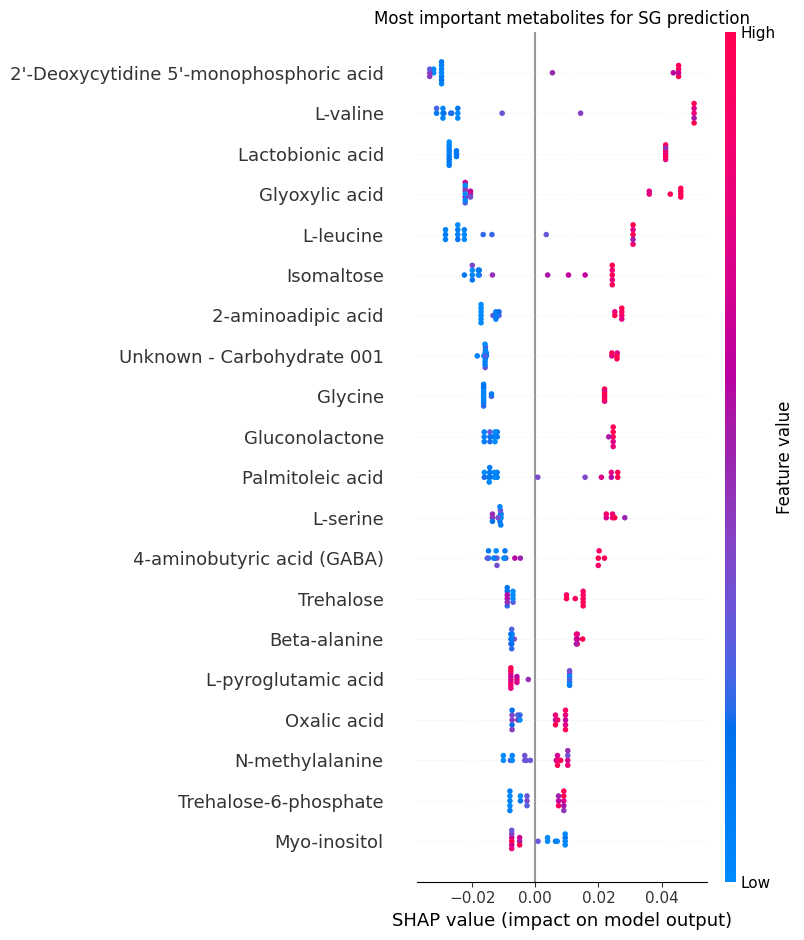

GLC


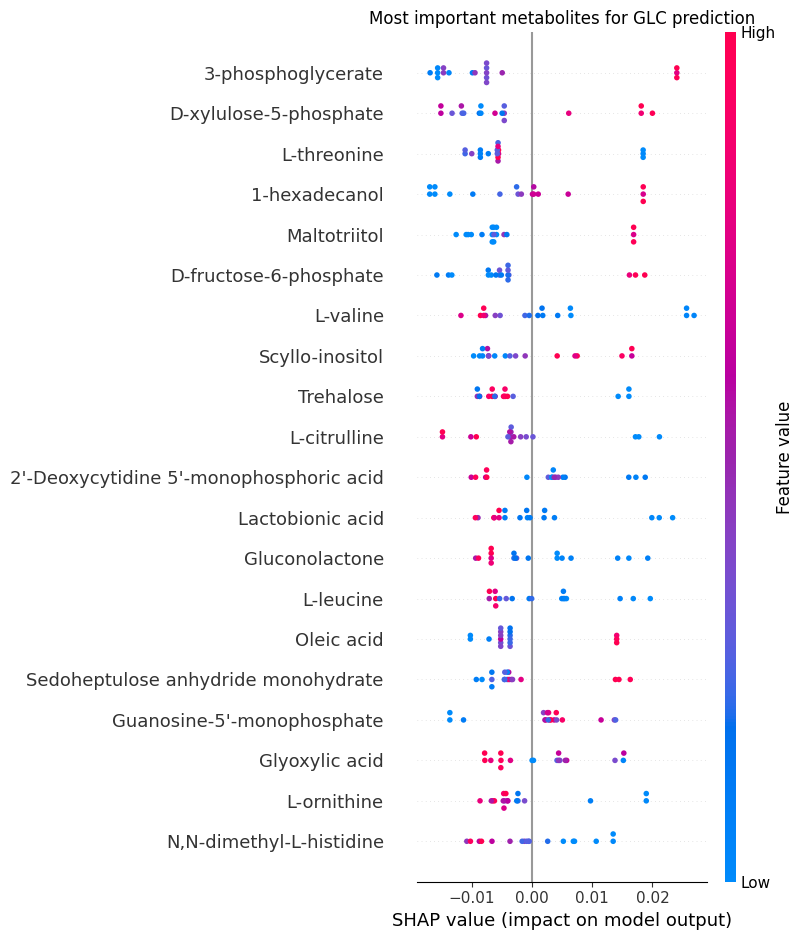

PHE


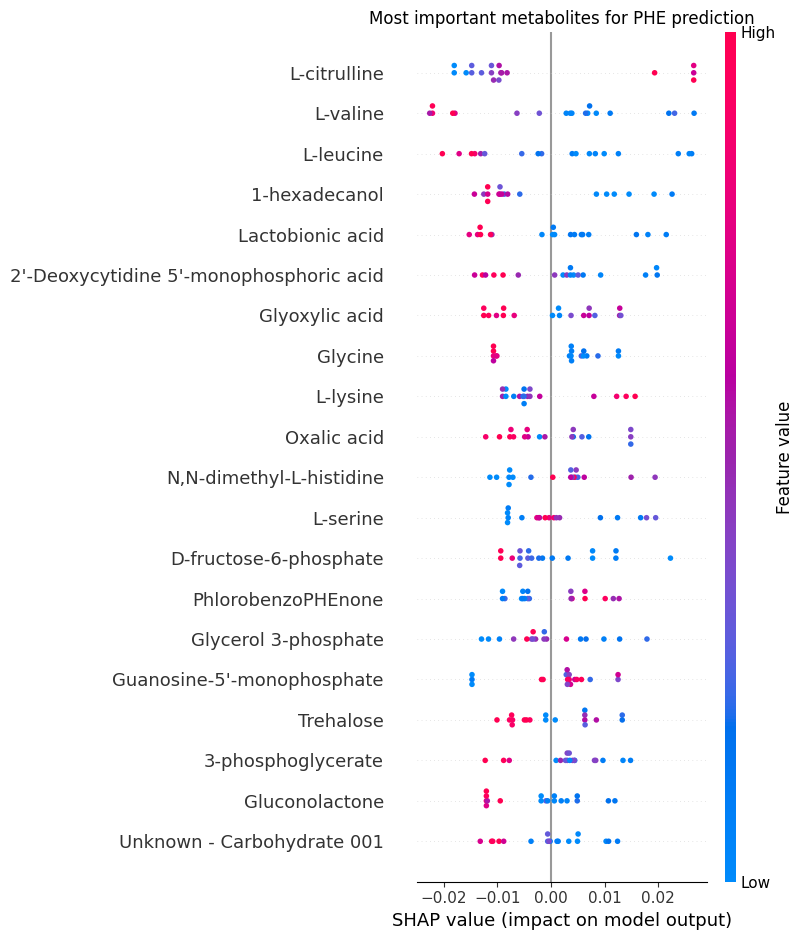

GLC/PHE


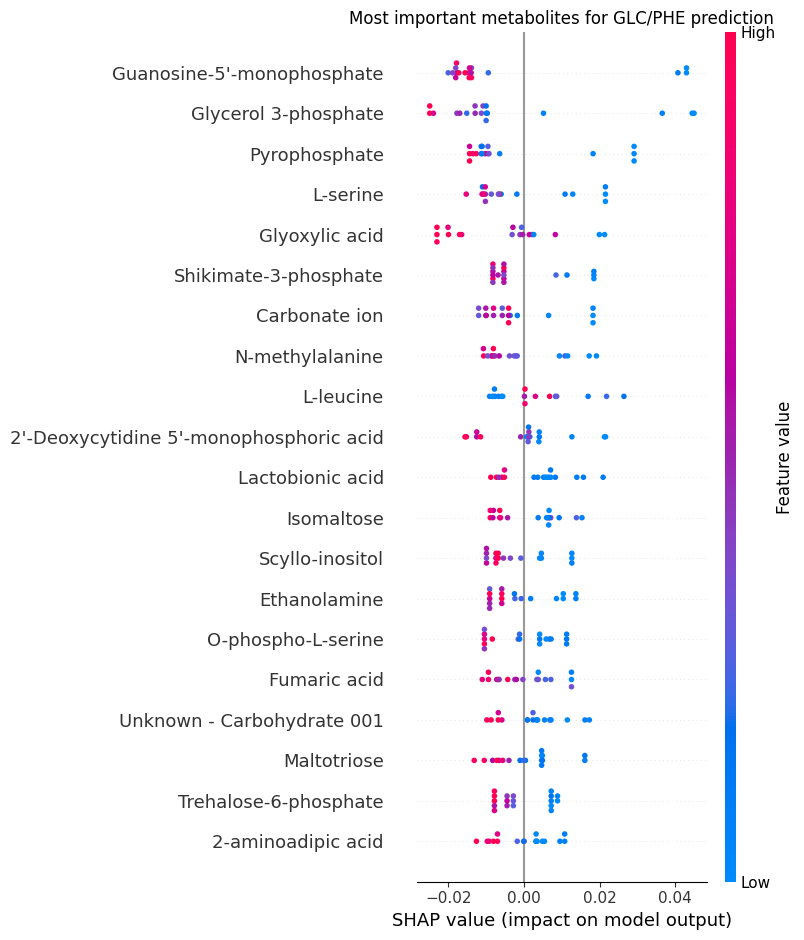

AMIX


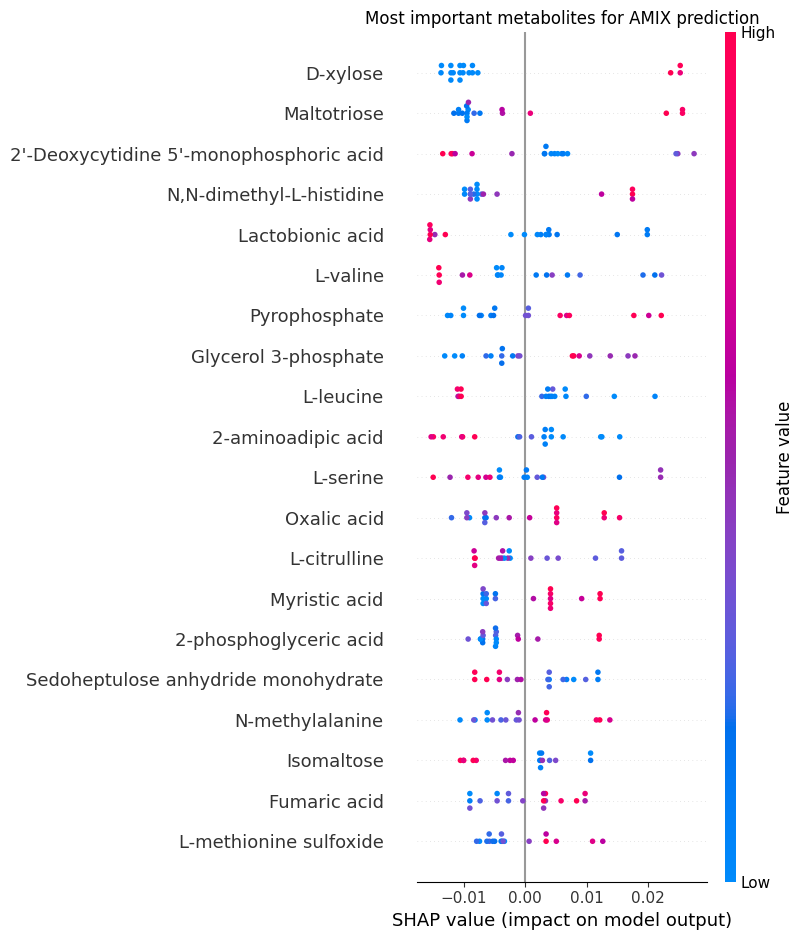

In [8]:
explainer2 = shap.TreeExplainer(model)
shap_values2 = explainer2(X)
Sample_names = ['SG', 'GLC', 'PHE', 'GLC/PHE', 'AMIX']


for index,sample in enumerate(Sample_names):
    print(sample)
    plt.title(f"Most important metabolites for {sample} prediction")
    shap.summary_plot(shap_values2[:,:,index])


## Tables

In [9]:
shap_values_numbers = shap_values2.values

# for index,sample in enumerate(Sample_names):
#     print(sample)
#     shap_df = pd.DataFrame(shap_values_numbers[:, :, index], columns = X.columns, index = y)
    
#     display(shap_df)

## Reordered Tables

In [10]:
for index, sample in enumerate(Sample_names):
    print(sample)
    shap_df = pd.DataFrame(shap_values_numbers[:, :, index], columns=X.columns, index=y)
    
    # Sort columns by absolute mean Shapley value for each class
    shap_df2 = shap_df.reindex(shap_df.abs().mean().sort_values(ascending=False).index, axis=1)
    
    if sample == "GLC/PHE":
        csv_filename = "./Results/GLC_PHE_shap.csv"
    else:
        csv_filename = f"./Results/{sample}_shap.csv"

    # Saving Dataframe to CSV
    shap_df2.to_csv(csv_filename)

    display(shap_df2)

SG


,2'-Deoxycytidine 5'-monophosphoric acid,L-valine,Lactobionic acid,Glyoxylic acid,L-leucine,Isomaltose,2-aminoadipic acid,Unknown - Carbohydrate 001,Glycine,Gluconolactone,...,Methyl phosphate,L-malic acid,D-xylulose-5-phosphate,L-isoleucine,L-homoserine,L-glutamic acid,Adenosine-5-monophosphate,L-cysteine,Lauric acid,Unknown - Carbohydrate 002
sample,,,,,,,,,,,,,,,,,,,,,
SG,-0.033472,-0.010517,-0.025000,0.046111,-0.016528,-0.013590,-0.017201,-0.015892,-0.013889,-0.014390,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SG,-0.033472,-0.028993,-0.025000,-0.022222,-0.024583,-0.019979,-0.017201,-0.015892,-0.016389,-0.014390,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SG,-0.033472,-0.026813,-0.025000,-0.022222,-0.028472,-0.019979,-0.017201,-0.015809,-0.013889,-0.014390,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GLC,-0.029722,-0.029284,-0.027308,-0.022222,-0.022500,-0.018056,-0.017201,-0.015833,-0.016389,-0.016201,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GLC,-0.029722,-0.029284,-0.027308,-0.022222,-0.022500,-0.018056,-0.017201,-0.015916,-0.016389,-0.016201,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GLC,-0.029722,-0.029284,-0.027308,-0.022222,-0.022500,-0.019979,-0.017201,-0.015916,-0.016389,-0.016201,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PHE,-0.029722,-0.024580,-0.027308,-0.022222,-0.013750,-0.022479,-0.012500,-0.018403,-0.016389,-0.012778,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PHE,-0.032222,-0.024580,-0.027308,-0.022222,-0.024583,-0.017756,-0.012500,-0.015945,-0.016389,-0.012778,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PHE,-0.032222,-0.024580,-0.027308,-0.022222,-0.024583,-0.017756,-0.012500,-0.015945,-0.016389,-0.012778,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


GLC


,3-phosphoglycerate,D-xylulose-5-phosphate,L-threonine,1-hexadecanol,Maltotriitol,D-fructose-6-phosphate,L-valine,Scyllo-inositol,Trehalose,L-citrulline,...,Dehydroalanine,Phosphate Ion,Phytanic acid,Trehalose-6-phosphate,"1,4-butanediol",L-tyrosine,Methyl phosphate,Stearic acid,Adenosine-5-monophosphate,Unknown - Carbohydrate 002
sample,,,,,,,,,,,,,,,,,,,,,
SG,-0.009421,-0.011548,-0.005724,-0.005291,-0.010036,-0.003811,-0.005256,0.004203,-0.006567,-0.003955,...,-0.000625,-0.000556,0.000243,-0.000364,0.000549,0.000352,0.0,0.0,0.0,0.0
SG,-0.014644,-0.008442,-0.007217,-0.001738,-0.010557,-0.005353,0.001006,0.007165,-0.003106,-0.003427,...,-0.000625,-0.004726,0.000459,0.000956,-0.000741,0.000352,0.0,0.0,0.0,0.0
SG,-0.014644,-0.008442,-0.005724,-0.002524,-0.008265,-0.005353,-0.000432,0.007519,-0.006567,-0.003427,...,-0.000625,-0.001450,0.000243,0.000956,-0.000741,0.000352,0.0,0.0,0.0,0.0
GLC,0.024043,0.018144,0.018458,0.018473,0.016881,0.017187,0.025659,0.014949,0.016098,0.021160,...,0.002484,0.001182,0.001954,0.003641,0.001725,0.000352,0.0,0.0,0.0,0.0
GLC,0.024043,0.019995,0.018458,0.018473,0.016881,0.018727,0.026905,0.016583,0.016098,0.017737,...,0.002484,0.000362,0.001954,0.001071,0.001725,0.000352,0.0,0.0,0.0,0.0
GLC,0.024043,0.018144,0.018458,0.018473,0.016881,0.016187,0.025659,0.016583,0.014316,0.017185,...,0.002484,0.001182,-0.000765,-0.002212,0.001725,0.002481,0.0,0.0,0.0,0.0
PHE,-0.015617,-0.011683,-0.009958,-0.016928,-0.006564,-0.007222,0.004293,-0.008170,-0.008651,-0.002993,...,0.000880,0.000203,0.000624,-0.000347,0.000549,0.000352,0.0,0.0,0.0,0.0
PHE,-0.015617,-0.011294,-0.011063,-0.016928,-0.006564,-0.006726,0.006393,-0.008170,-0.009034,-0.001852,...,0.000880,0.000203,0.000258,-0.000046,0.000549,0.000352,0.0,0.0,0.0,0.0
PHE,-0.015617,-0.008702,-0.011063,-0.013595,-0.006564,-0.007202,0.006479,-0.009652,-0.009034,0.000185,...,0.000880,0.000362,0.000258,-0.000522,0.000285,0.000352,0.0,0.0,0.0,0.0


PHE


,L-citrulline,L-valine,L-leucine,1-hexadecanol,Lactobionic acid,2'-Deoxycytidine 5'-monophosphoric acid,Glyoxylic acid,Glycine,L-lysine,Oxalic acid,...,Arachidic acid,L-methionine sulfoxide,"1,4-butanediol",Turanose,L-malic acid,Stearic acid,Uracil,Adenosine-5-monophosphate,Lauric acid,Unknown - Carbohydrate 002
sample,,,,,,,,,,,,,,,,,,,,,
SG,-0.012973,-0.002190,-0.001758,-0.008731,0.005897,0.005045,-0.008842,0.005646,-0.005868,-0.007482,...,0.000305,-0.000261,0.001177,-0.000616,0.000293,0.0,0.0,0.0,0.0,0.0
SG,-0.014798,0.007193,0.009917,-0.012540,0.003648,0.000674,0.008176,0.008753,-0.009042,-0.012187,...,0.000305,0.000479,-0.000710,0.000148,0.000293,0.0,0.0,0.0,0.0,0.0
SG,-0.014798,0.006451,0.008261,-0.005831,0.004369,0.002942,0.007111,0.006670,-0.009042,-0.009612,...,0.000305,-0.000063,-0.000710,0.000308,0.000293,0.0,0.0,0.0,0.0,0.0
GLC,-0.018056,0.003885,0.007149,-0.011815,0.000663,0.003621,0.007090,0.003826,-0.005028,0.005761,...,-0.002616,-0.000121,0.000239,0.000308,0.000479,0.0,0.0,0.0,0.0,0.0
GLC,-0.015834,0.002834,0.012559,-0.011815,-0.001696,0.005982,0.001581,0.006049,-0.005028,0.003894,...,-0.002616,0.000537,0.000239,0.000148,0.000479,0.0,0.0,0.0,0.0,0.0
GLC,-0.018056,0.003588,0.004649,-0.011815,0.000295,0.003621,0.003731,0.003826,-0.005028,0.007032,...,-0.002616,0.000537,0.000086,0.000148,0.000479,0.0,0.0,0.0,0.0,0.0
PHE,-0.008201,0.011029,-0.005458,0.008461,0.005657,0.009253,0.006096,0.003769,-0.006950,-0.002139,...,0.000156,-0.000299,0.001177,-0.000616,-0.000411,0.0,0.0,0.0,0.0,0.0
PHE,-0.011113,0.008437,-0.002403,0.011794,0.000422,0.004205,0.000266,0.003439,-0.008421,0.004142,...,0.000156,-0.000021,0.000205,-0.000296,-0.000411,0.0,0.0,0.0,0.0,0.0
PHE,-0.011113,0.006834,0.003945,0.010370,0.007031,0.002242,0.001398,0.003728,-0.008421,0.004142,...,-0.000208,-0.000021,0.000273,-0.000296,-0.000208,0.0,0.0,0.0,0.0,0.0


GLC/PHE


,Guanosine-5'-monophosphate,Glycerol 3-phosphate,Pyrophosphate,L-serine,Glyoxylic acid,Shikimate-3-phosphate,Carbonate ion,N-methylalanine,L-leucine,2'-Deoxycytidine 5'-monophosphoric acid,...,Palmitic acid,Uracil,Stearic acid,L-proline,Adenosine-5-monophosphate,"Benzene-1,2,4-triol",Lactic acid,L-cysteine,Lauric acid,Unknown - Carbohydrate 002
sample,,,,,,,,,,,,,,,,,,,,,
SG,-0.015522,-0.012866,-0.014343,-0.010166,-0.019907,-0.005278,-0.008014,-0.008203,0.008361,0.001116,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SG,-0.017792,-0.017686,-0.014343,-0.010942,-0.000599,-0.008180,-0.009946,-0.010610,-0.005586,0.001322,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SG,-0.017189,-0.016922,-0.014343,-0.010166,-0.001016,-0.006816,-0.008014,-0.008588,-0.005903,0.001283,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GLC,-0.019991,-0.024865,-0.006381,0.010881,-0.002891,-0.008180,-0.001724,-0.002555,-0.008109,0.004063,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GLC,-0.018001,-0.024865,-0.011255,-0.005997,0.002618,-0.008180,-0.010057,0.009389,-0.009053,0.001563,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GLC,-0.018811,-0.023895,-0.011255,0.012915,0.002132,-0.008180,-0.010057,0.011562,-0.008303,0.004063,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PHE,0.040687,0.036556,0.029115,0.021543,0.008313,0.018487,0.018266,0.017247,0.021839,0.012688,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PHE,0.042955,0.044450,0.029115,0.021543,0.021322,0.018487,0.018266,0.019173,0.026427,0.021592,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PHE,0.042955,0.044958,0.029115,0.021543,0.019933,0.018487,0.018266,0.010840,0.016969,0.021275,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


AMIX


,D-xylose,Maltotriose,2'-Deoxycytidine 5'-monophosphoric acid,"N,N-dimethyl-L-histidine",Lactobionic acid,L-valine,Pyrophosphate,Glycerol 3-phosphate,L-leucine,2-aminoadipic acid,...,Uracil,L-PHEnylalanine,Palmitic acid,Maleamic acid,Thymine,Adenine,Methyl phosphate,Stearic acid,Adenosine-5-monophosphate,Unknown - Carbohydrate 002
sample,,,,,,,,,,,,,,,,,,,,,
SG,0.025259,0.022991,0.024577,0.017478,0.019893,0.022223,0.020132,0.013856,0.009948,0.012489,...,-0.000406,0.001435,0.002400,-0.000208,0.001897,0.0,0.0,0.0,0.0,0.0
SG,0.025259,0.025630,0.027518,0.017478,0.014997,0.021117,0.017703,0.016751,0.014515,0.012302,...,0.003389,0.001435,0.002400,0.002910,0.000479,0.0,0.0,0.0,0.0,0.0
SG,0.023699,0.025630,0.024860,0.017478,0.019893,0.019193,0.022170,0.017885,0.021148,0.015399,...,0.000813,-0.002870,0.002400,-0.000486,0.000479,0.0,0.0,0.0,0.0,0.0
GLC,-0.007728,-0.003780,0.004782,-0.007866,-0.000127,-0.003797,-0.007180,0.007904,0.006636,0.004255,...,-0.001694,-0.000509,-0.000725,-0.000486,0.000479,0.0,0.0,0.0,0.0,0.0
GLC,-0.010067,-0.003711,0.003374,-0.009888,0.001975,-0.004429,-0.007467,0.007684,0.004354,0.006176,...,-0.001694,-0.000509,-0.000725,-0.000486,0.000479,0.0,0.0,0.0,0.0,0.0
GLC,-0.010146,-0.011632,0.005963,-0.009888,-0.002337,-0.003937,-0.005165,0.008794,0.006511,0.004255,...,-0.001694,0.000255,0.000325,-0.000486,0.000479,0.0,0.0,0.0,0.0,0.0
PHE,-0.008604,-0.009549,0.004225,-0.007858,0.003886,0.006883,-0.010064,-0.010256,0.002710,0.003253,...,-0.000215,0.000255,0.000325,-0.000208,0.000293,0.0,0.0,0.0,0.0,0.0
PHE,-0.008604,-0.010868,0.003123,-0.007858,0.003834,-0.004517,-0.010064,-0.013124,0.003815,0.003253,...,-0.000215,0.000116,0.000325,-0.000208,0.000293,0.0,0.0,0.0,0.0,0.0
PHE,-0.009160,-0.010868,0.005301,-0.007858,0.002538,-0.004667,-0.012662,-0.011498,0.004109,0.003068,...,-0.000215,0.000116,0.000325,0.000729,-0.000208,0.0,0.0,0.0,0.0,0.0


## Shap Scatter Plots

In [30]:
# Get the feature names from the Explanation object
feature_names = shap_values2.feature_names
feature_index = feature_names.index("L-valine")

0          SG
1          SG
2          SG
3         GLC
4         GLC
5         GLC
6         PHE
7         PHE
8         PHE
9     GLC/PHE
10    GLC/PHE
11    GLC/PHE
12       AMIX
13       AMIX
14       AMIX
15       AMIX
16       AMIX
17       AMIX
Name: sample, dtype: object

## Scatter plots

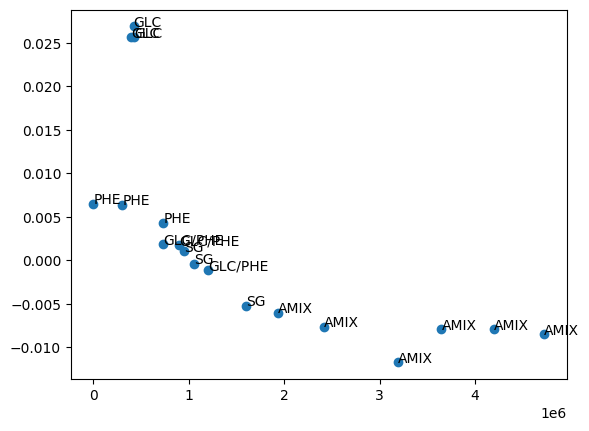

In [55]:
# Define function to plot measured and shap values based on metabolite and carbon source

def scatterplot(metabolite, carbon_source):
    carbon_source_index = Sample_names.index(carbon_source)
    feature_index = feature_names.index(metabolite)

    shap_data = shap_values2[:, feature_index, carbon_source_index].values

    measured_data = shap_values2[:, feature_index, carbon_source_index].data

    fig, ax = plt.subplots()
    ax.scatter(measured_data, shap_data)

    for i, txt in enumerate(y):
        ax.annotate(txt, (measured_data[i], shap_data[i]))


scatterplot("L-valine", "GLC")